In [14]:
from PIL import Image
from PIL.ExifTags import TAGS
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np

### This document shows the results of metadata analysis and visualization. 

#### Metadata was read (extracted) from images from the NFDI resource Tomographiedaten.tar. They are from PP13. 

#### There are 719 images in tif format. They are from SEM.

In [15]:
def readFile(file_path):
    image = Image.open(file_path)

    exif = image.getexif()

    if exif is None:
        return

    exif_data = {}
    for tag_id, value in exif.items():
        
        tag = TAGS.get(tag_id, tag_id)
        
        if tag == 34682:
            
            metadata = value
            
    return metadata


        
mdValueIni = readFile("/Users/elias/Desktop/NFDI Tomographiedaten/20200818_AlSi13 XRM tomo2/Images/SEM Image/SEM Image - SliceImage - 001.tif")
fileMetadataList = []
#readMetadata(mdValueIni, fileMetadataList)

### Image contane a big range of information. We need to read only **the values of maschine parameters**. A function **readFile** takes a parameter file path and reades only Information from the maschine in INI format.

### Next, you see the read parameters of the machine in the **INI format**.

In [16]:
print(mdValueIni)

[User]
Date=08/18/2020
Time=01:40:03 PM
User=user
UserText=
UserTextUnicode=

[System]
Type=DualBeam
Dnumber=9952707
Software=14.5.1.432
BuildNr=432
Source=FEG
Column=Elstar
FinalLens=Elstar
Chamber=xT-SDB
Stage=110 x 110
Pump=TMP
ESEM=no
Aperture=AVA
Scan=PIA 3.0
Acq=PIA 3.0
EucWD=0.004
SystemType=Helios G4 PFIB CXe
DisplayWidth=0.518
DisplayHeight=0.324

[Beam]
HV=15000
Spot=1
StigmatorX=0.0153243
StigmatorY=0.00747505
BeamShiftX=4.53441e-009
BeamShiftY=7.39361e-006
ScanRotation=0
ImageMode=Normal
FineStageBias=
Beam=EBeam
Scan=EScan

[EBeam]
Source=FEG
ColumnType=Elstar
FinalLens=Elstar
Acq=PIA 3.0
Aperture=AVA
ApertureDiameter=4.53e-005
HV=15000
HFW=0.000592
VFW=0.000394667
WD=0.00402349
BeamCurrent=1.6e-009
TiltCorrectionIsOn=no
DynamicFocusIsOn=no
DynamicWDIsOn=
ScanRotation=0
LensMode=Field-Free
LensModeA=
ATubeVoltage=
UseCase=
SemOpticalMode=
ImageMode=Normal
SourceTiltX=-0.000607639
SourceTiltY=0.00222222
StageX=0.000225267
StageY=-0.00468056
StageZ=0.00402333
StageR=0.648119

 ### Reading metadata in INI format from images is done using the "readMetadata" function. 
 
The function **"readMetadata"** receives as a parameter the name of the image, the read text from the file in the INI format, and the dictionary list **MetadataList** that contains the metadata of all the images.

After reading the metadata in INI format, they are transformed into **a dictionary**, where the key of the dictionary is the metadata term and the value of the key is the value of the metadata term. For each image will be created seperate dictionary with metadata of the image. Created dictionary will be added to the list of metadata dictionary **MetadataList**. 

In [17]:
def readMetadata(filename, text, MetadataList):
    
    mdValueIniList = text.split("\n")

    mdValueList = []

    metadataDict = {}
    indexList = []
    
    file = filename.split('/')
    
    metadataDict["filename"] = file[-1]

    for item in mdValueIniList:
            newItemitem = item.replace("\r", "")
            mdValueList.append(newItemitem)

    for item in mdValueList:       
        if "]" in item:
            index = mdValueList.index(item)
            indexList.append(index)


    for item in range(len(indexList)):
        k = item + 1

        if k == len(indexList):
            sublist = mdValueList[indexList[item]:]

        else:
            sublist = mdValueList[indexList[item]:indexList[k]]



        for item in sublist[1:]:

            if "=" in item:
                newItem = item.split('=')
        
                if newItem[1] == "":
                    newItem[1] = "NaN"
                    
                value = newItem[1]

                metadataDict[sublist[0].strip() + " " + newItem[0]] = value

    
    MetadataList.append(metadataDict)


In [18]:
import os

dirname = '/Users/elias/Desktop/NFDI Tomographiedaten/20200818_AlSi13 XRM tomo2/Images/SEM Image/'

MetadataList = []

fileNumber = 0
for fname in os.listdir(dirname):
    fileNumber += 1
    
    fpath = os.path.join(dirname, fname)
    
    mdValue = readFile(fpath)
    
    readMetadata(fpath, mdValue, MetadataList)
    

In [19]:
print(len(MetadataList))

719


### Analysis and visualization of metadata is carried out using the Python library Pandas. 

Next, you can see the visualization of the metadata as a DataFrame table. Each column of the table represents
a metadata term and rows represent values of each file. 

In INI format the terms are grouped. For Example: [User], [System], [Beam]. To track the hierarchy of the terms columns' names consyst from two parts: the group name and term itself.  

In [20]:
indexDf = len(MetadataList)
indexList = []

#creating DataFrame from the metadata List, each row of the DataFrame (df) is seperate file metadata, columns are metadata keys
for i in range(indexDf):
    indexList.append(i+1)

df = pd.DataFrame.from_records(MetadataList, index = indexList) 

df.head()


filename [User] Date  [User] Time [User] User  \
1  SEM Image - SliceImage - 085.tif  08/18/2020  05:51:07 PM        user   
2  SEM Image - SliceImage - 091.tif  08/18/2020  06:09:06 PM        user   
3  SEM Image - SliceImage - 708.tif  08/20/2020  01:22:08 AM        user   
4  SEM Image - SliceImage - 046.tif  08/18/2020  03:55:11 PM        user   
5  SEM Image - SliceImage - 052.tif  08/18/2020  04:13:12 PM        user   

  [User] UserText [User] UserTextUnicode [System] Type [System] Dnumber  \
1             NaN                    NaN      DualBeam          9952707   
2             NaN                    NaN      DualBeam          9952707   
3             NaN                    NaN      DualBeam          9952707   
4             NaN                    NaN      DualBeam          9952707   
5             NaN                    NaN      DualBeam          9952707   

  [System] Software [System] BuildNr  ... [HiResIllumination] DarkFieldIsOn  \
1        14.5.1.432              432  ...                               NaN   
2        14.5.1.432              432  ...                               NaN   
3        14.5.1.432              432  ...                               NaN   
4        14.5.1.432              432  ...                               NaN   
5        14.5.1.432              432  ...                               NaN   

  [HiResIllumination] DarkFieldValue [EasyLift] Rotation  \
1                                NaN                   0   
2                                NaN                   0   
3                                NaN                   0   
4                                NaN                   0   
5                                NaN                   0   

  [HotStageMEMS] HeatingCurrent [HotStageMEMS] HeatingVoltage  \
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   
5                           NaN                           NaN   

  [HotStageMEMS] TargetTemperature [HotStageMEMS] ActualTemperature  \
1                              NaN                              NaN   
2                              NaN                              NaN   
3                              NaN                              NaN   
4                              NaN                              NaN   
5                              NaN                              NaN   

  [HotStageMEMS] HeatingPower [HotStageMEMS] SampleBias  \
1                         NaN                       NaN   
2                         NaN                       NaN   
3                         NaN                       NaN   
4                         NaN                       NaN   
5                         NaN                       NaN   

  [HotStageMEMS] SampleResistance  
1                             NaN  
2                             NaN  
3                             NaN  
4                             NaN  
5                             NaN  

[5 rows x 159 columns]

In [21]:
df.describe()

filename [User] Date  [User] Time [User] User  \
count                                719         719          719         719   
unique                               719           3          719           1   
top     SEM Image - SliceImage - 085.tif  08/19/2020  05:51:07 PM        user   
freq                                   1         474            1         719   

       [User] UserText [User] UserTextUnicode [System] Type [System] Dnumber  \
count              719                    719           719              719   
unique               1                      1             1                1   
top                NaN                    NaN      DualBeam          9952707   
freq               719                    719           719              719   

       [System] Software [System] BuildNr  ...  \
count                719              719  ...   
unique                 1                1  ...   
top           14.5.1.432              432  ...   
freq                 719              719  ...   

       [HiResIllumination] DarkFieldIsOn [HiResIllumination] DarkFieldValue  \
count                                719                                719   
unique                                 1                                  1   
top                                  NaN                                NaN   
freq                                 719                                719   

       [EasyLift] Rotation [HotStageMEMS] HeatingCurrent  \
count                  719                           719   
unique                   1                             1   
top                      0                           NaN   
freq                   719                           719   

       [HotStageMEMS] HeatingVoltage [HotStageMEMS] TargetTemperature  \
count                            719                              719   
unique                             1                                1   
top                              NaN                              NaN   
freq                             719                              719   

       [HotStageMEMS] ActualTemperature [HotStageMEMS] HeatingPower  \
count                               719                         719   
unique                                1                           1   
top                                 NaN                         NaN   
freq                                719                         719   

       [HotStageMEMS] SampleBias [HotStageMEMS] SampleResistance  
count                        719                             719  
unique                         1                               1  
top                          NaN                             NaN  
freq                         719                             719  

[4 rows x 159 columns]

#### Analyzing the DataFrame table we can see that there are 719 files and each file consists of 159 metadata terms.

In [22]:
df.shape

(719, 159)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 1 to 719
Columns: 159 entries, filename to [HotStageMEMS] SampleResistance
dtypes: object(159)
memory usage: 898.8+ KB


### Next there is represented a dictionary **Columns with the same Values**, which shows the constant Metadata Terms with their values. For example: the metadata term  '[User] User' of all images has the constand value 'user' etc.

The List **Columns with the range of Values** represents the the metadata values with changing values.  

In [24]:
theSameValue = []  #only list of columns
theSameValueDict = {}
differentValues = []

for column in df.columns:
    #cheks if the column has one value or not
    oneValue = df[column].eq(df[column].iloc[0]).all() 
    
    if oneValue:
        theSameValue.append(column)
        theSameValueDict[column] = df.iloc[0][column]
        
    else:
        differentValues.append(column)
        
print("Columns with the same Values:", "\n",theSameValueDict, "\n")

print("Columns with the range of Values:", "\n",differentValues)

Columns with the same Values: 
 {'[User] User': 'user', '[User] UserText': 'NaN', '[User] UserTextUnicode': 'NaN', '[System] Type': 'DualBeam', '[System] Dnumber': '9952707', '[System] Software': '14.5.1.432', '[System] BuildNr': '432', '[System] Source': 'FEG', '[System] Column': 'Elstar', '[System] FinalLens': 'Elstar', '[System] Chamber': 'xT-SDB', '[System] Stage': '110 x 110', '[System] Pump': 'TMP', '[System] ESEM': 'no', '[System] Aperture': 'AVA', '[System] Scan': 'PIA 3.0', '[System] Acq': 'PIA 3.0', '[System] EucWD': '0.004', '[System] SystemType': 'Helios G4 PFIB CXe', '[System] DisplayWidth': '0.518', '[System] DisplayHeight': '0.324', '[Beam] HV': '15000', '[Beam] Spot': '1', '[Beam] StigmatorX': '0.0153243', '[Beam] StigmatorY': '0.00747505', '[Beam] ScanRotation': '0', '[Beam] ImageMode': 'Normal', '[Beam] FineStageBias': 'NaN', '[Beam] Beam': 'EBeam', '[Beam] Scan': 'EScan', '[EBeam] Source': 'FEG', '[EBeam] ColumnType': 'Elstar', '[EBeam] FinalLens': 'Elstar', '[EBeam]

### As a result of the analysis, it was found that 140 metadata terms have constant values and 19 terms have changing values.

In [25]:
print(len(theSameValueDict))
print(len(differentValues))

140
19


### Some metadata values has missing data among the constant ones. The List **"List Of Columns with Empty Values"** represents columns with missing values.  There are 39 metadata terms out of 140 with missing data. 

In [26]:
columnsNaN = []

for column in df:

    #sumNaN = df[column].isnull().sum()
    sumNaN = df[column].str.contains('NaN').sum()
    if sumNaN == df.shape[0]:
        columnsNaN.append(column)
        
print("List Of Columns with Empty Values:", "\n", columnsNaN, "\n")
print("There are", len(columnsNaN), "with missing data.")

List Of Columns with Empty Values: 
 ['[User] UserText', '[User] UserTextUnicode', '[Beam] FineStageBias', '[EBeam] DynamicWDIsOn', '[EBeam] LensModeA', '[EBeam] ATubeVoltage', '[EBeam] UseCase', '[EBeam] SemOpticalMode', '[EBeam] EmissionCurrent', '[EBeam] PreTilt', '[EBeam] WehneltBias', '[Stage] SpecTilt', '[Image] ZoomPanX', '[Image] ZoomPanY', '[Image] MagCanvasRealWidth', '[Image] MagnificationMode', '[Image] ScreenMagCanvasRealWidth', '[Image] ScreenMagnificationMode', '[Image] PostProcessing', '[Image] Transformation', '[Vacuum] Gas', '[Vacuum] Humidity', '[Specimen] Temperature', '[Detectors] Mode', '[ETD] Signal', '[PrivateFei] DataBarSelected', '[PrivateFei] DataBarAvailable', '[PrivateFei] DatabarHeight', '[HiResIllumination] BrightFieldIsOn', '[HiResIllumination] BrightFieldValue', '[HiResIllumination] DarkFieldIsOn', '[HiResIllumination] DarkFieldValue', '[HotStageMEMS] HeatingCurrent', '[HotStageMEMS] HeatingVoltage', '[HotStageMEMS] TargetTemperature', '[HotStageMEMS] A

### Folowing there is represented a DataDrame table with metadata terms with missing data. 

In [27]:
dfNaN = df[[c for c in df.columns if c in columnsNaN]]

print("DataFrame with Columns with Empty Values:", "\n")

dfNaN.head()

DataFrame with Columns with Empty Values: 



[User] UserText [User] UserTextUnicode [Beam] FineStageBias  \
1             NaN                    NaN                  NaN   
2             NaN                    NaN                  NaN   
3             NaN                    NaN                  NaN   
4             NaN                    NaN                  NaN   
5             NaN                    NaN                  NaN   

  [EBeam] DynamicWDIsOn [EBeam] LensModeA [EBeam] ATubeVoltage  \
1                   NaN               NaN                  NaN   
2                   NaN               NaN                  NaN   
3                   NaN               NaN                  NaN   
4                   NaN               NaN                  NaN   
5                   NaN               NaN                  NaN   

  [EBeam] UseCase [EBeam] SemOpticalMode [EBeam] EmissionCurrent  \
1             NaN                    NaN                     NaN   
2             NaN                    NaN                     NaN   
3             NaN                    NaN                     NaN   
4             NaN                    NaN                     NaN   
5             NaN                    NaN                     NaN   

  [EBeam] PreTilt  ... [HiResIllumination] BrightFieldValue  \
1             NaN  ...                                  NaN   
2             NaN  ...                                  NaN   
3             NaN  ...                                  NaN   
4             NaN  ...                                  NaN   
5             NaN  ...                                  NaN   

  [HiResIllumination] DarkFieldIsOn [HiResIllumination] DarkFieldValue  \
1                               NaN                                NaN   
2                               NaN                                NaN   
3                               NaN                                NaN   
4                               NaN                                NaN   
5                               NaN                                NaN   

  [HotStageMEMS] HeatingCurrent [HotStageMEMS] HeatingVoltage  \
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   
5                           NaN                           NaN   

  [HotStageMEMS] TargetTemperature [HotStageMEMS] ActualTemperature  \
1                              NaN                              NaN   
2                              NaN                              NaN   
3                              NaN                              NaN   
4                              NaN                              NaN   
5                              NaN                              NaN   

  [HotStageMEMS] HeatingPower [HotStageMEMS] SampleBias  \
1                         NaN                       NaN   
2                         NaN                       NaN   
3                         NaN                       NaN   
4                         NaN                       NaN   
5                         NaN                       NaN   

  [HotStageMEMS] SampleResistance  
1                             NaN  
2                             NaN  
3                             NaN  
4                             NaN  
5                             NaN  

[5 rows x 39 columns]

### In the following DataFrame table you can see the metadata with changing values.

In [28]:
dfDifferrentValues = df[[c for c in df.columns if c in differentValues]]

dfSorted = dfDifferrentValues.sort_values(by=['filename'])

dfSorted

filename [User] Date  [User] Time  \
511  SEM Image - SliceImage - 001.tif  08/18/2020  01:40:03 PM   
474  SEM Image - SliceImage - 002.tif  08/18/2020  01:43:43 PM   
509  SEM Image - SliceImage - 003.tif  08/18/2020  01:45:16 PM   
398  SEM Image - SliceImage - 004.tif  08/18/2020  01:49:18 PM   
433  SEM Image - SliceImage - 005.tif  08/18/2020  01:51:14 PM   
..                                ...         ...          ...   
552  SEM Image - SliceImage - 715.tif  08/20/2020  01:42:29 AM   
591  SEM Image - SliceImage - 716.tif  08/20/2020  01:46:41 AM   
631  SEM Image - SliceImage - 717.tif  08/20/2020  01:48:37 AM   
204  SEM Image - SliceImage - 718.tif  08/20/2020  01:52:50 AM   
161  SEM Image - SliceImage - 719.tif  08/20/2020  01:54:46 AM   

    [Beam] BeamShiftX [Beam] BeamShiftY  [EBeam] WD [EBeam] StageX  \
511      4.53441e-009      7.39361e-006  0.00402349    0.000225267   
474      4.52356e-009      7.39364e-006  0.00402365    0.000225267   
509      4.51527e-009      7.39367e-006  0.00402381    0.000225267   
398      4.50698e-009      7.39369e-006  0.00402396    0.000225267   
433      4.49869e-009      7.39371e-006  0.00402412    0.000225267   
..                ...               ...         ...            ...   
552      -1.3895e-009      7.41084e-006  0.00413648    0.000225273   
591     -1.39779e-009      7.41086e-006  0.00413664    0.000225273   
631     -1.40609e-009      7.41088e-006  0.00413679    0.000225273   
204     -1.41439e-009      7.41091e-006  0.00413695    0.000225273   
161     -1.42269e-009      7.41093e-006  0.00413711    0.000225273   

    [EBeam] StageY [EBeam] StageTa [EBeam] BeamShiftX [EBeam] BeamShiftY  \
511    -0.00468056        0.336851       4.53441e-009       7.39361e-006   
474    -0.00468056        0.336851       4.52356e-009       7.39364e-006   
509    -0.00468056         0.33685       4.51527e-009       7.39367e-006   
398    -0.00468056        0.336851       4.50698e-009       7.39369e-006   
433    -0.00468056        0.336851       4.49869e-009       7.39371e-006   
..             ...             ...                ...                ...   
552    -0.00468058         0.33685       -1.3895e-009       7.41084e-006   
591    -0.00468058        0.336849      -1.39779e-009       7.41086e-006   
631    -0.00468058         0.33685      -1.40609e-009       7.41088e-006   
204    -0.00468058         0.33685      -1.41439e-009       7.41091e-006   
161    -0.00468058         0.33685      -1.42269e-009       7.41093e-006   

    [Stage] StageX [Stage] StageY [Stage] StageT [Stage] WorkingDistance  \
511    0.000225271    -0.00467317       0.336851              0.00402349   
474    0.000225271    -0.00467317       0.336851              0.00402365   
509    0.000225271    -0.00467317        0.33685              0.00402381   
398    0.000225271    -0.00467317       0.336851              0.00402396   
433    0.000225271    -0.00467317       0.336851              0.00402412   
..             ...            ...            ...                     ...   
552    0.000225271    -0.00467317        0.33685              0.00413648   
591    0.000225271    -0.00467317        0.33685              0.00413664   
631    0.000225271    -0.00467317        0.33685              0.00413679   
204    0.000225271    -0.00467317        0.33685              0.00413695   
161    0.000225271    -0.00467317        0.33685              0.00413711   

    [Image] DriftCorrected [Vacuum] ChPressure [Specimen] SpecimenCurrent  \
511                    Off             0.00012              -9.45602e-010   
474                    Off            0.000118              -1.01355e-009   
509                    Off            0.000119              -1.00539e-009   
398                    Off            0.000117              -1.01817e-009   
433                    Off            0.000116              -9.44088e-010   
..                     ...                 ...                        ...   
552                    Off    

### In the following we can see that all metadatterms with changing values hat type "Object". 

In [29]:
dfDifferrentValues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 1 to 719
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   filename                     719 non-null    object
 1   [User] Date                  719 non-null    object
 2   [User] Time                  719 non-null    object
 3   [Beam] BeamShiftX            719 non-null    object
 4   [Beam] BeamShiftY            719 non-null    object
 5   [EBeam] WD                   719 non-null    object
 6   [EBeam] StageX               719 non-null    object
 7   [EBeam] StageY               719 non-null    object
 8   [EBeam] StageTa              719 non-null    object
 9   [EBeam] BeamShiftX           719 non-null    object
 10  [EBeam] BeamShiftY           719 non-null    object
 11  [Stage] StageX               719 non-null    object
 12  [Stage] StageY               719 non-null    object
 13  [Stage] StageT               719 no

### In order to make some analysis type of the some terms shoudl be changed to the Numbers. Folowing there is represented a new table where type of the some columns was changed to "float64" . That means this columns have only number values. 

In [30]:
dfDifferrentValues= dfDifferrentValues.apply(pd.to_numeric, errors='ignore') 

In [31]:
dfDifferrentValues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 1 to 719
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   filename                     719 non-null    object 
 1   [User] Date                  719 non-null    object 
 2   [User] Time                  719 non-null    object 
 3   [Beam] BeamShiftX            719 non-null    float64
 4   [Beam] BeamShiftY            719 non-null    float64
 5   [EBeam] WD                   719 non-null    float64
 6   [EBeam] StageX               719 non-null    float64
 7   [EBeam] StageY               719 non-null    float64
 8   [EBeam] StageTa              719 non-null    float64
 9   [EBeam] BeamShiftX           719 non-null    float64
 10  [EBeam] BeamShiftY           719 non-null    float64
 11  [Stage] StageX               719 non-null    float64
 12  [Stage] StageY               719 non-null    float64
 13  [Stage] StageT      

### Pandas DataFrame can provide descriptive statistics. As a resul of the descriptive statistics for numerical data will be shown a table which contanes count, mean, std, min, max as well as lower, 50 and upper percentiles for each column. 

In [32]:
dfDifferrentValues.describe()

[Beam] BeamShiftX  [Beam] BeamShiftY  [EBeam] WD  [EBeam] StageX  \
count       7.190000e+02       7.190000e+02  719.000000    7.190000e+02   
mean        1.555081e-09       7.402276e-06    0.004080    2.252706e-04   
std         1.722524e-09       5.008544e-09    0.000033    1.866491e-08   
min        -1.422690e-09       7.393610e-06    0.004023    2.251840e-04   
25%         6.650530e-11       7.397950e-06    0.004052    2.252685e-04   
50%         1.555330e-09       7.402280e-06    0.004080    2.252700e-04   
75%         3.043775e-09       7.406605e-06    0.004109    2.252720e-04   
max         4.534410e-09       7.410930e-06    0.004137    2.253530e-04   

       [EBeam] StageY  [EBeam] StageTa  [EBeam] BeamShiftX  \
count    7.190000e+02     7.190000e+02        7.190000e+02   
mean    -4.680570e-03     3.368503e-01        1.555081e-09   
std      1.314655e-08     7.201508e-07        1.722524e-09   
min     -4.680650e-03     3.368470e-01       -1.422690e-09   
25%     -4.680570e-03     3.368500e-01        6.650530e-11   
50%     -4.680570e-03     3.368500e-01        1.555330e-09   
75%     -4.680560e-03     3.368510e-01        3.043775e-09   
max     -4.680480e-03     3.368510e-01        4.534410e-09   

       [EBeam] BeamShiftY  [Stage] StageX  [Stage] StageY  [Stage] StageT  \
count        7.190000e+02    7.190000e+02    7.190000e+02    7.190000e+02   
mean         7.402276e-06    2.252717e-04   -4.673171e-03    3.368504e-01   
std          5.008544e-09    1.870220e-08    1.170502e-08    4.970849e-07   
min          7.393610e-06    2.251880e-04   -4.673250e-03    3.368490e-01   
25%          7.397950e-06    2.252710e-04   -4.673170e-03    3.368500e-01   
50%          7.402280e-06    2.252710e-04   -4.673170e-03    3.368500e-01   
75%          7.406605e-06    2.252710e-04   -4.673170e-03    3.368510e-01   
max          7.410930e-06    2.253550e-04   -4.673080e-03    3.368510e-01   

       [Stage] WorkingDistance  [Vacuum] ChPressure  \
count               719.000000           719.000000   
mean                  0.004080             0.000064   
std                   0.000033             0.000014   
min                   0.004023             0.000054   
25%                   0.004052             0.000055   
50%                   0.004080             0.000058   
75%                   0.004109             0.000067   
max                   0.004137             0.000120   

       [Specimen] SpecimenCurrent  
count                7.190000e+02  
mean                -1.111846e-09  
std                  7.679274e-11  
min                 -1.232930e-09  
25%                 -1.174915e-09  
50%                 -1.117620e-09  
75%                 -1.059010e-09  
max                 -9.193170e-10

In [33]:
colForPlotting = []


for column in dfDifferrentValues:
    if dfDifferrentValues.dtypes[column] == "float64":
        colForPlotting.append(column)
        


### There is apportunity to sort table by particular column. Hear you can see the DataFrame table with sorted by filename. 

In [34]:
dfSorted = dfDifferrentValues.sort_values(by=['filename'])

dfSorted

filename [User] Date  [User] Time  \
511  SEM Image - SliceImage - 001.tif  08/18/2020  01:40:03 PM   
474  SEM Image - SliceImage - 002.tif  08/18/2020  01:43:43 PM   
509  SEM Image - SliceImage - 003.tif  08/18/2020  01:45:16 PM   
398  SEM Image - SliceImage - 004.tif  08/18/2020  01:49:18 PM   
433  SEM Image - SliceImage - 005.tif  08/18/2020  01:51:14 PM   
..                                ...         ...          ...   
552  SEM Image - SliceImage - 715.tif  08/20/2020  01:42:29 AM   
591  SEM Image - SliceImage - 716.tif  08/20/2020  01:46:41 AM   
631  SEM Image - SliceImage - 717.tif  08/20/2020  01:48:37 AM   
204  SEM Image - SliceImage - 718.tif  08/20/2020  01:52:50 AM   
161  SEM Image - SliceImage - 719.tif  08/20/2020  01:54:46 AM   

     [Beam] BeamShiftX  [Beam] BeamShiftY  [EBeam] WD  [EBeam] StageX  \
511       4.534410e-09           0.000007    0.004023        0.000225   
474       4.523560e-09           0.000007    0.004024        0.000225   
509       4.515270e-09           0.000007    0.004024        0.000225   
398       4.506980e-09           0.000007    0.004024        0.000225   
433       4.498690e-09           0.000007    0.004024        0.000225   
..                 ...                ...         ...             ...   
552      -1.389500e-09           0.000007    0.004136        0.000225   
591      -1.397790e-09           0.000007    0.004137        0.000225   
631      -1.406090e-09           0.000007    0.004137        0.000225   
204      -1.414390e-09           0.000007    0.004137        0.000225   
161      -1.422690e-09           0.000007    0.004137        0.000225   

     [EBeam] StageY  [EBeam] StageTa  [EBeam] BeamShiftX  [EBeam] BeamShiftY  \
511       -0.004681         0.336851        4.534410e-09            0.000007   
474       -0.004681         0.336851        4.523560e-09            0.000007   
509       -0.004681         0.336850        4.515270e-09            0.000007   
398       -0.004681         0.336851        4.506980e-09            0.000007   
433       -0.004681         0.336851        4.498690e-09            0.000007   
..              ...              ...                 ...                 ...   
552       -0.004681         0.336850       -1.389500e-09            0.000007   
591       -0.004681         0.336849       -1.397790e-09            0.000007   
631       -0.004681         0.336850       -1.406090e-09            0.000007   
204       -0.004681         0.336850       -1.414390e-09            0.000007   
161       -0.004681         0.336850       -1.422690e-09            0.000007   

     [Stage] StageX  [Stage] StageY  [Stage] StageT  [Stage] WorkingDistance  \
511        0.000225       -0.004673        0.336851                 0.004023   
474        0.000225       -0.004673        0.336851                 0.004024   
509        0.000225       -0.004673        0.336850                 0.004024   
398        0.000225       -0.004673        0.336851                 0.004024   
433        0.000225       -0.004673        0.336851                 0.004024   
..              ...             ...             ...                      ...   
552        0.000225       -0.004673        0.336850                 0.004136   
591        0.000225       -0.004673        0.336850                 0.004137   
631        0.000225       -0.004673        0.336850                 0.004137   
204        0.000225       -0.004673        0.336850                 0.004137   
161        0.000225       -0.004673        0.336850                 0.004137   

    [Image] DriftCorrected  [Vacuum] ChPressure  [Specimen] SpecimenCurrent  \
511                    Off             0.000120               -9.456020e-10   
474                    Off             0.000118               -1.013550e-09   
509                    Off             0.000119               -1.005390e-09   
398                    Off             0.000117               -1.018170e-09   
433                    Off             0.0

### we can also select columns and display on the table only selected columns. Next there is displayed table only with two columns: "filename" and "[Stage] WorkingDistance"

In [35]:
dfSorted[["filename","[Stage] WorkingDistance"]]

filename  [Stage] WorkingDistance
511  SEM Image - SliceImage - 001.tif                 0.004023
474  SEM Image - SliceImage - 002.tif                 0.004024
509  SEM Image - SliceImage - 003.tif                 0.004024
398  SEM Image - SliceImage - 004.tif                 0.004024
433  SEM Image - SliceImage - 005.tif                 0.004024
..                                ...                      ...
552  SEM Image - SliceImage - 715.tif                 0.004136
591  SEM Image - SliceImage - 716.tif                 0.004137
631  SEM Image - SliceImage - 717.tif                 0.004137
204  SEM Image - SliceImage - 718.tif                 0.004137
161  SEM Image - SliceImage - 719.tif                 0.004137

[719 rows x 2 columns]

### In the following charts, data from columns with the float type was visualized. When visualizing, the data was sorted by file name. In the x-axis you can see the value of the columns and in the y-axis you can see the names of the files. To improve the design, the names of the files have been removed, but they are presented from 1 file to 719.

ROWS 7 <class 'int'>


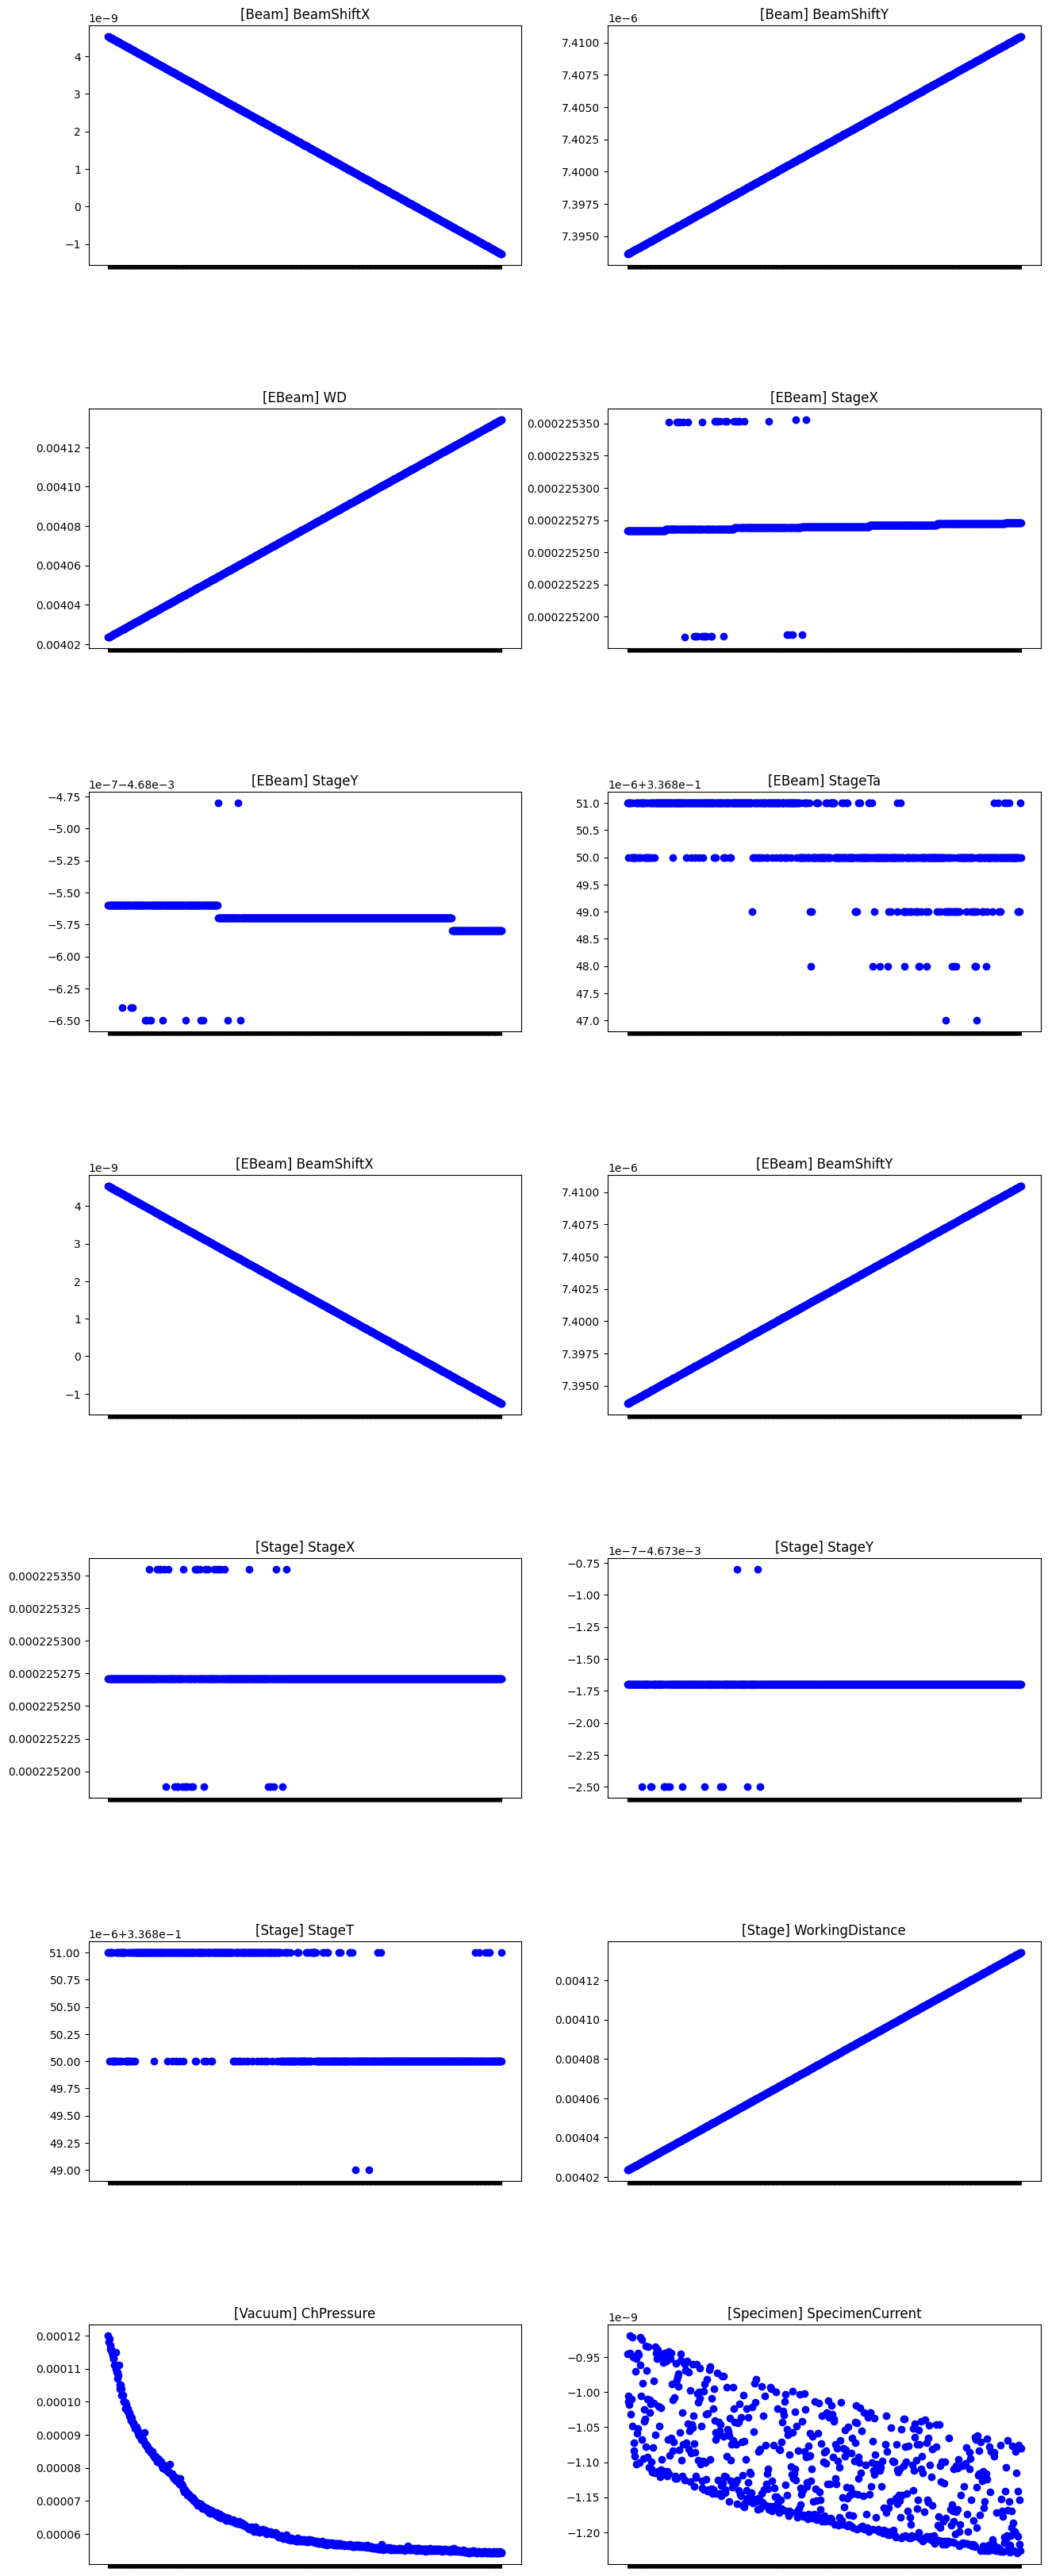

In [36]:
length = len(colForPlotting)

if length % 2 == 0:
    rows = int(length/2)

else:
    rows = int(length//2)

print("ROWS", rows, type(rows))

dfSortedPart = dfSorted.iloc[:700]

fig,a =  plt.subplots(rows,2, figsize=(15, 40))
# set the spacing between subplots

k = 0
l = 0

y = dfSortedPart["filename"]

for column in colForPlotting:
    
    x = dfSortedPart[column]
        
    a[k][l].plot(y,x, 'o', color='blue')
    
    
    a[k][l].set_title(column)
    a[k][l].tick_params(axis='x', rotation=90)
    a[k][l].axes.xaxis.set_ticklabels([])
    l += 1
    
    if l > 1:
        k +=1
        l = 0
        
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.6)
    
    

### 

In [37]:
dfDifferrentValues.loc[(dfDifferrentValues['[EBeam] StageX'] >= 0.000225300) & (dfDifferrentValues['[EBeam] StageX'] <= 0.000225355)]

filename [User] Date  [User] Time  \
15   SEM Image - SliceImage - 318.tif  08/19/2020  05:33:41 AM   
53   SEM Image - SliceImage - 092.tif  08/18/2020  06:13:10 PM   
95   SEM Image - SliceImage - 252.tif  08/19/2020  02:14:26 AM   
129  SEM Image - SliceImage - 134.tif  08/18/2020  08:19:13 PM   
130  SEM Image - SliceImage - 108.tif  08/18/2020  07:01:06 PM   
158  SEM Image - SliceImage - 094.tif  08/18/2020  06:19:11 PM   
237  SEM Image - SliceImage - 178.tif  08/18/2020  10:31:24 PM   
285  SEM Image - SliceImage - 190.tif  08/18/2020  11:07:31 PM   
320  SEM Image - SliceImage - 194.tif  08/18/2020  11:19:37 PM   
327  SEM Image - SliceImage - 156.tif  08/18/2020  09:25:16 PM   
340  SEM Image - SliceImage - 208.tif  08/19/2020  12:01:53 AM   
411  SEM Image - SliceImage - 158.tif  08/18/2020  09:31:18 PM   
415  SEM Image - SliceImage - 164.tif  08/18/2020  09:49:20 PM   
448  SEM Image - SliceImage - 198.tif  08/18/2020  11:31:43 PM   
479  SEM Image - SliceImage - 200.tif  08/18/2020  11:37:45 PM   
531  SEM Image - SliceImage - 160.tif  08/18/2020  09:37:19 PM   
534  SEM Image - SliceImage - 174.tif  08/18/2020  10:19:22 PM   
659  SEM Image - SliceImage - 100.tif  08/18/2020  06:37:11 PM   
676  SEM Image - SliceImage - 074.tif  08/18/2020  05:19:11 PM   
691  SEM Image - SliceImage - 300.tif  08/19/2020  04:39:22 AM   
719  SEM Image - SliceImage - 088.tif  08/18/2020  06:01:08 PM   

     [Beam] BeamShiftX  [Beam] BeamShiftY  [EBeam] WD  [EBeam] StageX  \
15        1.903630e-09           0.000007    0.004074        0.000225   
53        3.777500e-09           0.000007    0.004038        0.000225   
95        2.450930e-09           0.000007    0.004063        0.000225   
129       3.429300e-09           0.000007    0.004045        0.000225   
130       3.644850e-09           0.000007    0.004040        0.000225   
158       3.760920e-09           0.000007    0.004038        0.000225   
237       3.064500e-09           0.000007    0.004052        0.000225   
285       2.965010e-09           0.000007    0.004053        0.000225   
320       2.931840e-09           0.000007    0.004054        0.000225   
327       3.246900e-09           0.000007    0.004048        0.000225   
340       2.815760e-09           0.000007    0.004056        0.000225   
411       3.230320e-09           0.000007    0.004048        0.000225   
415       3.180580e-09           0.000007    0.004049        0.000225   
448       2.898680e-09           0.000007    0.004055        0.000225   
479       2.882090e-09           0.000007    0.004055        0.000225   
531       3.213740e-09           0.000007    0.004049        0.000225   
534       3.097670e-09           0.000007    0.004051        0.000225   
659       3.711170e-09           0.000007    0.004039        0.000225   
676       3.926720e-09           0.000007    0.004035        0.000225   
691       2.052900e-09           0.000007    0.004071        0.000225   
719       3.810660e-09           0.000007    0.004037        0.000225   

     [EBeam] StageY  [EBeam] StageTa  [EBeam] BeamShiftX  [EBeam] BeamShiftY  \
15        -0.004681         0.336851        1.903630e-09            0.000007   
53        -0.004681         0.336851        3.777500e-09            0.000007   
95        -0.004681         0.336851        2.450930e-09            0.000007   
129       -0.004681         0.336851        3.429300e-09            0.000007   
130       -0.004681         0.336851        3.644850e-09            0.000007   
158       -0.004681         0.336851        3.760920e-09            0.000007   
237       -0.004681         0.336851        3.064500e-09            0.000007   
285       -0.004681         0.336851        2.965010e-09            0.000007   
320       -0.004681         0.336851        2.931840e-09            0.000007   
327       -0.004681         0.336851        3.246900e-09            0.000007   
340       -0.004681         0.336851        2.815760e-09            0.000007   
411      

### Columns with row type can be visualized in a histogram. In the following graphs, the "[User] Date" and "[Image] DriftCorrected" columns are visualized in a histogram. 

<AxesSubplot: title={'center': '[User] Date'}, xlabel='[User] Date', ylabel='count'>

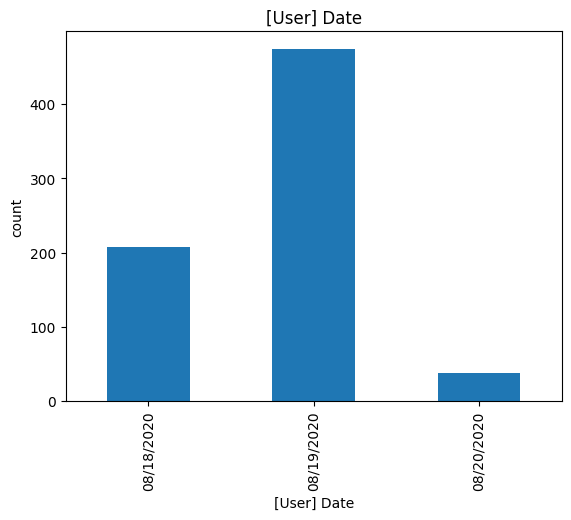

In [38]:
dfForGrouping = dfSorted[["[User] Date", 'filename']]
groupd  = dfForGrouping.groupby("[User] Date")['filename'].count()

groupd.plot(kind='bar', title='[User] Date', ylabel='count',
         xlabel='[User] Date')

### We can also show the files of each group. The example below shows the name of the images that were made on 08/20/2020.

In [39]:
groupd  = dfSorted.groupby("[User] Date")

dfGroup = groupd.get_group("08/20/2020")  #shows only files from particular group value, we can choose group and show which files are there or see also another metdata values
dfGroup[["filename", "[User] Date"]]  

filename [User] Date
32   SEM Image - SliceImage - 682.tif  08/20/2020
21   SEM Image - SliceImage - 683.tif  08/20/2020
137  SEM Image - SliceImage - 684.tif  08/20/2020
124  SEM Image - SliceImage - 685.tif  08/20/2020
177  SEM Image - SliceImage - 686.tif  08/20/2020
188  SEM Image - SliceImage - 687.tif  08/20/2020
617  SEM Image - SliceImage - 688.tif  08/20/2020
606  SEM Image - SliceImage - 689.tif  08/20/2020
136  SEM Image - SliceImage - 690.tif  08/20/2020
125  SEM Image - SliceImage - 691.tif  08/20/2020
176  SEM Image - SliceImage - 692.tif  08/20/2020
189  SEM Image - SliceImage - 693.tif  08/20/2020
73   SEM Image - SliceImage - 694.tif  08/20/2020
84   SEM Image - SliceImage - 695.tif  08/20/2020
33   SEM Image - SliceImage - 696.tif  08/20/2020
20   SEM Image - SliceImage - 697.tif  08/20/2020
650  SEM Image - SliceImage - 698.tif  08/20/2020
661  SEM Image - SliceImage - 699.tif  08/20/2020
587  SEM Image - SliceImage - 700.tif  08/20/2020
549  SEM Image - SliceImage - 701.tif  08/20/2020
594  SEM Image - SliceImage - 702.tif  08/20/2020
630  SEM Image - SliceImage - 703.tif  08/20/2020
680  SEM Image - SliceImage - 704.tif  08/20/2020
718  SEM Image - SliceImage - 705.tif  08/20/2020
674  SEM Image - SliceImage - 706.tif  08/20/2020
636  SEM Image - SliceImage - 707.tif  08/20/2020
3    SEM Image - SliceImage - 708.tif  08/20/2020
50   SEM Image - SliceImage - 709.tif  08/20/2020
681  SEM Image - SliceImage - 710.tif  08/20/2020
715  SEM Image - SliceImage - 711.tif  08/20/2020
677  SEM Image - SliceImage - 712.tif  08/20/2020
635  SEM Image - SliceImage - 713.tif  08/20/2020
586  SEM Image - SliceImage - 714.tif  08/20/2020
552  SEM Image - SliceImage - 715.tif  08/20/2020
591  SEM Image - SliceImage - 716.tif  08/20/2020
631  SEM Image - SliceImage - 717.tif  08/20/2020
204  SEM Image - SliceImage - 718.tif  08/20/2020
161  SEM Image - SliceImage - 719.tif  08/20/2020

### In the metadata there was defined only "Off" values of the term " [Image] DriftCorrected". Because of this we have replaced the missing data with the value "NaN". 

<AxesSubplot: title={'center': '[Image] DriftCorrected '}, xlabel='[Image] DriftCorrected ', ylabel='count'>

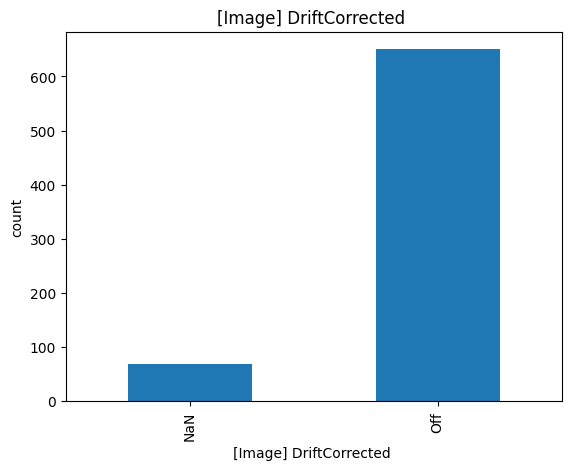

In [40]:
dfForGrouping = dfSorted[["[Image] DriftCorrected", 'filename']]
groupd  = dfForGrouping.groupby("[Image] DriftCorrected")['filename'].count()

groupd.plot(kind='bar', title='[Image] DriftCorrected ', ylabel='count',
         xlabel='[Image] DriftCorrected ')